No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


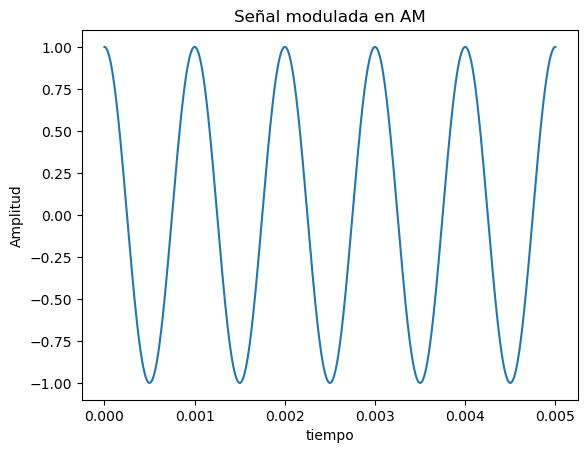

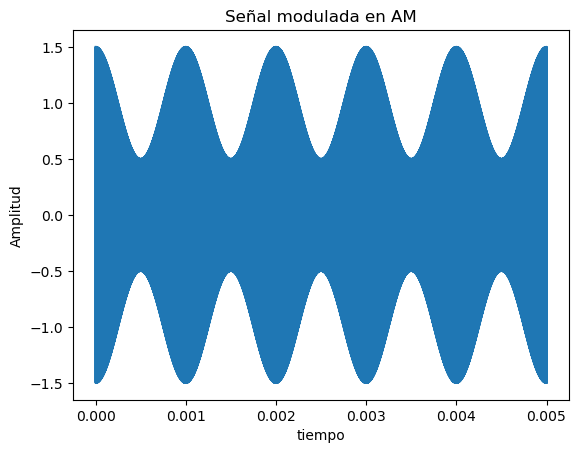

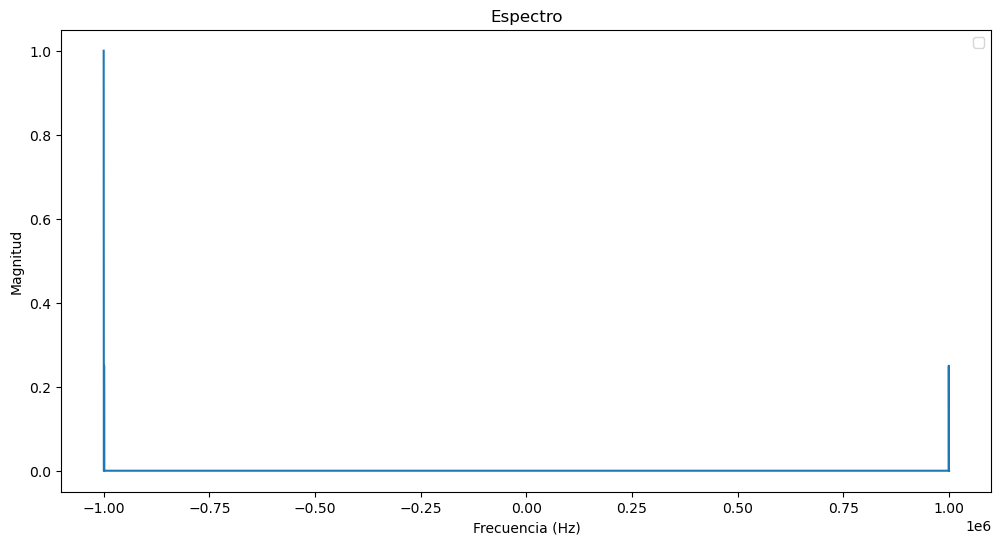

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


# Mensaje y Portadora 
fs = 2e6
fc = 1e6
fm = 1e3
N=(int)(fs/fm)*5  # Quiero un buffer circular, calculo fs/fm=2000, quiero 5 periodos, entonces N=5*2000=10000
m = 0.5
t = np.linspace(0, (N-1)/fs, N)

msj=np.cos(2*np.pi*fm*t)
carr=np.cos(2*np.pi*fc*t)

# Señal Modulada
AM = (1+m*msj)*carr

plt.figure()
plt.plot(t,msj)
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.title('Señal modulada en AM')

plt.figure()
plt.plot(t,AM)
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.title('Señal modulada en AM')

# En el espectro
fcia=np.linspace(-fs/2,fs/2,N)
F_AM=np.abs(np.fft.fftshift(np.fft.fft(AM)))/N

plt.figure(figsize=(12, 6))
plt.plot(fcia, F_AM)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro')
plt.legend()

# Guardo la señal en un archivo
AM = AM.astype(np.float32)
with open("TP1-2a-AM.bin", 'wb') as f:
    AM.tofile(f)